In [4]:
from fn_cfg import *
import params as cfg

In [5]:
"Laurel Place Dataset"
localPath = '/Users/joshuaighalo/Downloads/brainNet_datasets/laurel_place/cleaned_dataset'
img_save_path = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single_averages'
filename = '0002_1_12122019_1219'
version = 1.0

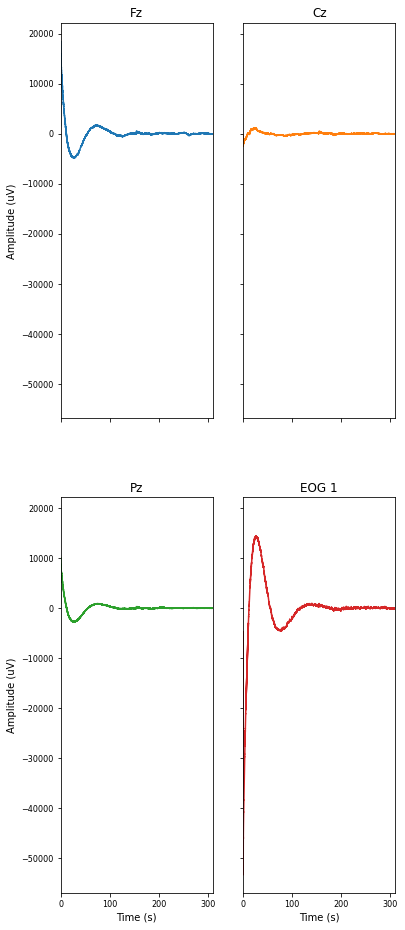

In [6]:
device = importFile.neurocatch()
fileObjects = device.init(version,filename,localPath,dispIMG=False)
rawEEG = fileObjects[0]
rawEOG = fileObjects[1]
rawEEGEOG = fileObjects[2]
time = fileObjects[3]
trigOutput = fileObjects[4]

plots(time,rawEEGEOG,titles=cfg.channelNames_1,figsize=cfg.figure_size,pltclr=cfg.plot_color_1)

In [10]:
# Get real amplitudes of FFT (only in postive frequencies)
data = rawEEG[:,0]
fft_vals = np.absolute(np.fft.rfft(data))

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

freq_ix = np.where((fft_freq >= 0) & (fft_freq <= 50))[0]
ampSpectrum = np.mean(fft_vals[freq_ix])